## Image Segmentation
### Dominant Colour Extraction using K-Means algorithm

In [40]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [41]:
img =  cv2.imread('images/anime.png') 
# COLOR_BGR2RGB for converting BGR color format to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape = img.shape
print(img.shape)

(1154, 1082, 3)


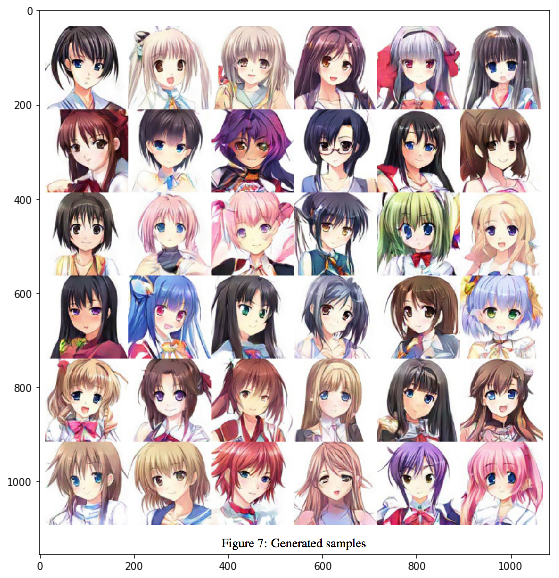

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [43]:
# for flattening image
flat = img.reshape((-1,3))
print(flat.shape)

(1248628, 3)


In [44]:
main_colors = 6

km = KMeans(n_clusters=main_colors)
km.fit(flat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
k_centers = km.cluster_centers_
# for values into integer values
k_centers = np.array(k_centers,dtype='uint8')
print(k_centers)

[[251 250 247]
 [ 62  46  57]
 [144 145 177]
 [196 136 131]
 [124  86  98]
 [226 202 194]]


### Plotting dominant colors

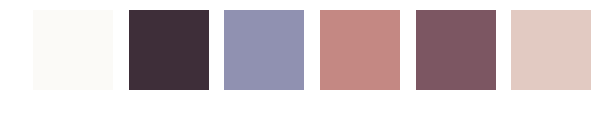

In [46]:
i = 1
plt.figure(0,figsize=(10,2))
colors = []

for k in k_centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i = i+1
    colors.append(k)
    arr = np.zeros((100,100,3),dtype='uint8')
    arr[:,:,:] = k
    plt.imshow(arr)
plt.show()

### Segmenting Image

In [47]:
new_img = np.zeros((1154*1082,3),dtype='uint8')

print(new_img.shape)

(1248628, 3)


In [48]:
colors

[array([251, 250, 247], dtype=uint8),
 array([62, 46, 57], dtype=uint8),
 array([144, 145, 177], dtype=uint8),
 array([196, 136, 131], dtype=uint8),
 array([124,  86,  98], dtype=uint8),
 array([226, 202, 194], dtype=uint8)]

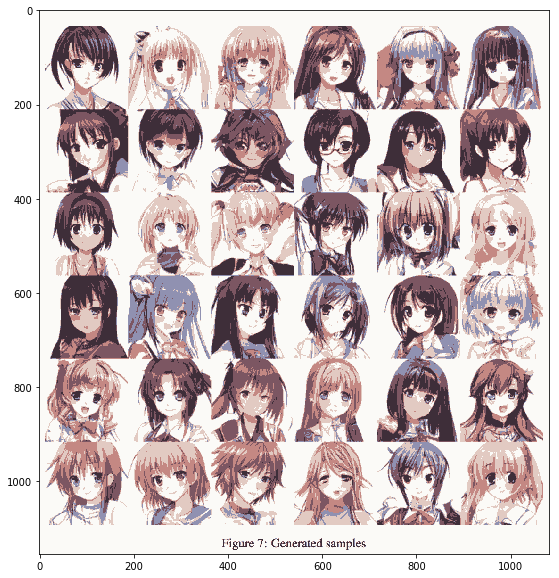

In [49]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
    
new_img = new_img.reshape((original_shape))
plt.figure(figsize=(10,10))
plt.imshow(new_img)
plt.show()